## Bayes Theorem

                                P(A|B) = P(B|A)*P(A) / P(B)

*Before we begin some of the terms : -*

##### Distribution
It can be thought as a map of all possible outcomes and their probability. The prior we defined in the last notebook can be said as a prior distribution.
            
    prior = {1: 1/6.0, 
             2: 1/6.0,
             3: 1/6.0,
             4: 1/6.0,
             5: 1/6.0,
             6: 1/6.0}


##### Probability Mass Function
A functional representation of the distribution, Given a hypothesis x the function returns its probability. When we are 
talking of continous distributions this function is called a probability density function.

##### Prior
The belief that we have before seeing the data is called a prior. It is represented by a distribution.

##### Bayesian Update
When we alter our belief by multiplying the likelihood with our prior is known as a bayesian update.

##### Posterior 
The distribution that we get after bayesian update is called a posterior.

We won't be implementing it here, instead we are going to use the pmf object defined by prof. Alen b. downey author of ThinkBayes. I will explain some of the helpful functions that he has added as we go.

In [3]:
%matplotlib inline

from thinkbayes2 import Pmf
import matplotlib.pyplot as plt

Now let's define a dice using the Pmf class

The Pmf class inherits the dict class, so you can manipulate it as a key value store

In [4]:
# Creating a 6 sided Dice, by default pmf assumes all the events are equally probable.
six_sided_dice = Pmf(range(1,7))

In [5]:
# print shows you the probability of all the hypothesis. 
six_sided_dice.Print()

1 0.16666666666666666
2 0.16666666666666666
3 0.16666666666666666
4 0.16666666666666666
5 0.16666666666666666
6 0.16666666666666666


In [6]:
# This will give you the probability of 1
six_sided_dice[1]

0.16666666666666666

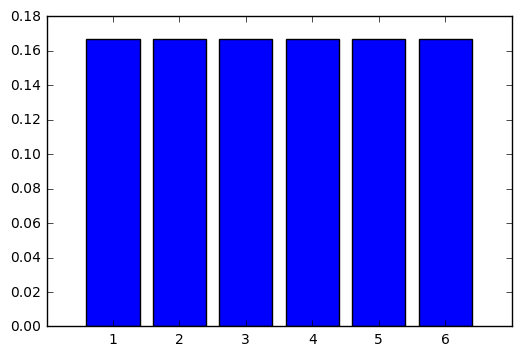

In [7]:
def plot_pmf(pmf, xlabel='x', ylabel='y'):
    """A ploting helper function to plot the pmf values."""
    x, y = list(pmf.Render())
    plt.bar(x, y, align='center')
    plt.xticks(x)
    
plot_pmf(six_sided_dice)

### The Die Problem

We have 5 die, 6 sided, 8 sided, 16 sided, 18 sided and 20 sided. Suppose I select a random die, roll it, and get a 8. What is the probability that I rolled each die ?

Objective: Calculate the probability for each dice. Given that I rolled a 8 from the random die that I choose

First step, Set our belief(aka, Prior). Lets take a uniform distribution as prior .i.e. all dices are equally probable

In [8]:
# Create a pmf object representing our belief
box = Pmf([6, 8, 16, 18, 20])
box.Print()

6 0.2
8 0.2
16 0.2
18 0.2
20 0.2


We have observed that the dice roll gave us 8.

So the second step is to update our prior, using 
        P(B|A)*P(A)
        
P(A) is our prior and P(B|A) in this case would be :-
        
        Probability of dice being the N sided die, given that we rolled a 8

Similarly we will emulate this Update for all the hypothesis/die

In [9]:
# Exercise 2.1 Calculate P(B|A)
box[6] *= 
box[8] *= 
box[16] *= 
box[18] *= 
box[20] *= 

SyntaxError: invalid syntax (<ipython-input-9-a5143b1d9b52>, line 2)

In [10]:
box.Print()

6 0.2
8 0.2
16 0.2
18 0.2
20 0.2


In [11]:
box.Total()

1.0

In [12]:
box.Normalize()
box.Print()

6 0.2
8 0.2
16 0.2
18 0.2
20 0.2


In [13]:
box.Total()

1.0

Now, lets try out multiple dice rolls. But first to make it simpler lets break the process down into functions


### The Bayesian framework

Here's the same computation encapsulated in a class.


In [15]:
class Die(Pmf):
    """A map from Dice to its probability of being the choosen one."""

    def __init__(self, hypos):
        """
        Initialize with a prior.

        hypos: sequence of hypothesis/possible outcomes.
        In our case it would be sides of the die
        """
        Pmf.__init__(self)
        # set a uniform prior
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()

    def Update(self, data):
        """
        Updates the PMF with new data.

        data: roll of the randomly choosen dice.
        """
        for hypo in self.Values():
            like = self.Likelihood(data, hypo)
            self.Mult(hypo, like)
        self.Normalize()

    def Likelihood(self, data, hypo):
        """
        The likelihood of the data under the hypothesis.
        
        What is the probability of seeing the data for the given hypothesis.
        P(D|H)
        """
        if hypo < data:
            return 0
        else:
            return 1 / float(hypo)

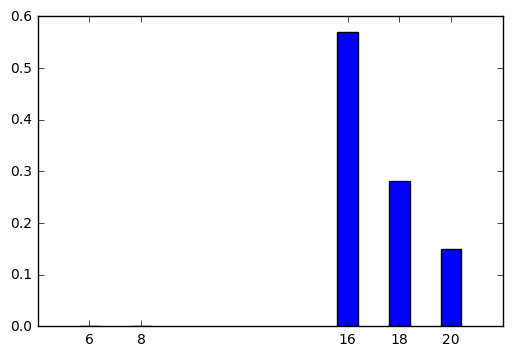

In [16]:
# Exercise 2.2 Play around the rolls array and dice input, to develop an intuition on how the numbers are changing.
box = Die([6,8,16,18,20])
rolls = [5, 6, 3, 1, 10, 15]

for roll in rolls:
    box.Update(roll)
    
plot_pmf(box)

### The Cookie Problem

Suppose there are 2 Jars, 1 with 20 vanilla and 30 chocolate cookies and another with 10 vanilla and 40 Chocolate cookies.
If we choose a jar at random and take out 1 cookie and that cookie is chocolate. 
What is the probability that it came from jar 2?

In [17]:
class Cookie(Pmf):
    """A map from string jar ID to probablity."""

    def __init__(self, hypos):
        """
        Initialize with a uniform prior .i.e. both jars are equally likely.

        hypos: list of hypothesis, represented by jar ids. 
        """
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()

    def Update(self, data):
        """
        Updates the PMF with new data.

        data: string of the cookie type taken out.
        """
        for hypo in self.Values():
            like = self.Likelihood(data, hypo)
            self.Mult(hypo, like)
        self.Normalize()
        total = 50
    
    cookies_count = {
        'jar 1': dict(vanilla=20, chocolate=30),
        'jar 2': dict(vanilla=10, chocolate=40)
    }
    
    mixes = {
        'jar 1':dict(vanilla=0.4, chocolate=0.6),
        # Fill in the probabilities for jar 2
        'jar 2':dict(vanilla=0., chocolate=0.),
        }

    def Likelihood(self, data, hypo):
        """
        The likelihood of the data under the hypothesis.

        data: string cookie type
        hypo: jar id
        """
        # Exercise 2.3 Write the likelihood function for the problem and replace return 0 with the likelihood
        
        return 1

*Exercise 2.4 Do an update and plot/print the posterior*

In [18]:
jars = Cookie(['jar 1', 'jar 2'])
# solution here 

Exercise 2.5 Now, try changing the likelihood function such that when I take out the cookie, I eat it.

In [19]:
# solution here
class Cookie(Cookie):
    def Likelihood(self, data, hypo):
        # Define the method!
        return 1